In [1]:
import steamreviews
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import datetime
import missingno as msno
import seaborn as sns

%matplotlib inline

In [ ]:
request_params = dict()
request_params['filter'] = 'all' 
request_params['day_range'] = '60' 
request_params['language'] = 'english' 


app_id = 1097150
review_dict, query_count = steamreviews.download_reviews_for_app_id(app_id,
                                                                    chosen_request_params=request_params)

In [2]:
with open('.../review_1097150.json') as jsonfile:
    f = json.load(jsonfile)

In [3]:
review_data = [v for v in f['reviews'].values()]
author_key_list = list(review_data[0]['author'].keys())

In [4]:
len(review_data)

14559

In [5]:
steam_dict = {'recommendationid':[review_data[i]['recommendationid'] for i in range(len(review_data))],
              
              'author_steamid':[review_data[i]['author']['steamid'] for i in range(len(review_data))],
              
              'author_num_games_owned':[review_data[i]['author']['num_games_owned'] for i in range(len(review_data))],
              
              'author_num_reviews':[review_data[i]['author']['num_reviews'] for i in range(len(review_data))],
              
              'author_playtime_forever':[review_data[i]['author']['playtime_forever'] for i in range(len(review_data))], 
              
              'author_playtime_last_two_weeks':[review_data[i]['author']['playtime_last_two_weeks'] for i in range(len(review_data))],
              
              'author_last_played':[review_data[i]['author']['last_played'] for i in range(len(review_data))],
              
              'review':[review_data[i]['review'] for i in range(len(review_data))],
              
              'timestamp_created':[review_data[i]['timestamp_created'] for i in range(len(review_data))],
              
              'timestamp_updated':[review_data[i]['timestamp_updated'] for i in range(len(review_data))],
              
              'voted_up':[review_data[i]['voted_up'] for i in range(len(review_data))],
              
              'weighted_vote_score':[review_data[i]['weighted_vote_score'] for i in range(len(review_data))],
              
              'steam_purchase':[review_data[i]['steam_purchase'] for i in range(len(review_data))],
              
              'received_for_free':[review_data[i]['received_for_free'] for i in range(len(review_data))],
              
              'written_during_early_access':[review_data[i]['written_during_early_access'] for i in range(len(review_data))]}

In [7]:
df_raw = pd.DataFrame(steam_dict)
df_raw.head()

,recommendationid,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_last_played,review,timestamp_created,timestamp_updated,voted_up,weighted_vote_score,steam_purchase,received_for_free,written_during_early_access
0,74474375,76561198830004913,348,34,971,247,1600602505,Fall Guys is a chill and fun game but it rea...,1597696032,1597696032,True,0.969307124614715576,True,False,False
1,73899674,76561198104502231,54,23,7395,819,1601273558,"I gave a little Hug to a player, he stared bac...",1596781693,1596781693,True,0.947030186653137207,True,False,False
2,74344973,76561199082327854,5,2,1791,7,1600371713,I'd reccomend it so much i'd buy it for you,1597492392,1597492392,True,0.941293001174926758,True,False,False
3,74829104,76561198118466702,74,9,1455,0,1599395918,you can hug people,1598265916,1598265916,True,0.940279126167297363,True,False,False
4,74014670,76561198169477203,1094,36,391,0,1599323988,"When I was a little boy, I liked to see the Wi...",1596956542,1596972249,True,0.934246063232421875,True,False,False


In [7]:
df_raw.tail()

,recommendationid,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_last_played,review,timestamp_created,timestamp_updated,voted_up,weighted_vote_score,steam_purchase,received_for_free,written_during_early_access
14554,73740731,76561198848771713,25,5,959,4,1601054410,very fun and competitive especially with frien...,1596534204,1596534204,True,0.5,True,False,False
14555,73737061,76561198365104636,65,2,1705,79,1600896386,This game is extremely fun and a nice break fr...,1596527904,1596527904,True,0.5,True,False,False
14556,73736582,76561198160511379,173,2,9,0,1596527084,Game dose not support 21:9,1596527143,1596527143,False,0.5,True,False,False
14557,74808815,76561198244287820,17,1,3477,120,1600708090,Fun to play & they keep working on this game,1598227102,1600545851,True,0.841063201427459717,True,False,False
14558,75195584,76561198075883037,3135,53,4348,644,1601309845,[h1]The Turn Around[/h1]\nIf you read my previ...,1598834438,1600522386,True,0.787338018417358398,False,False,False


In [8]:
df_raw.dtypes

recommendationid                  object
author_steamid                    object
author_num_games_owned             int64
author_num_reviews                 int64
author_playtime_forever            int64
author_playtime_last_two_weeks     int64
author_last_played                 int64
review                            object
timestamp_created                  int64
timestamp_updated                  int64
voted_up                            bool
weighted_vote_score               object
steam_purchase                      bool
received_for_free                   bool
written_during_early_access         bool
dtype: object

In [9]:
df_raw.shape

(14559, 15)

In [10]:
df_raw['voted_up'].value_counts(normalize=True)

True     0.746755
False    0.253245
Name: voted_up, dtype: float64

In [11]:
df_raw['steam_purchase'].value_counts()

True     12684
False     1875
Name: steam_purchase, dtype: int64

In [12]:
df_raw['received_for_free'].value_counts()

False    14108
True       451
Name: received_for_free, dtype: int64

In [13]:
df_raw['written_during_early_access'].value_counts()

False    14559
Name: written_during_early_access, dtype: int64

### reviews
1. recommendationid - The unique id of the recommendation
### author
1. steamid - the user’s SteamID
2. num_games_owned - number of games owned by the user
3. num_reviews - number of reviews written by the user
4. playtime_forever - lifetime playtime tracked in this app
5. playtime_last_two_weeks - playtime tracked in the past two weeks for this app
6. last_played - time for when the user last played
7. review - text of written review
8. timestamp_created - date the review was created (unix timestamp)
9. timestamp_updated - date the review was last updated (unix timestamp)
10. voted_up - true means it was a positive recommendation
11. weighted_vote_score - helpfulness score
12. steam_purchase - true if the user purchased the game on Steam
13. received_for_free - true if the user checked a box saying they got the app for free
14. written_during_early_access - true if the user posted this review while the game was in Early Access

In [8]:
df_raw.drop(['recommendationid', 'author_steamid', 'steam_purchase', 'received_for_free', 'written_during_early_access'], axis = 1, inplace = True)
df_raw.head()

,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_last_played,review,timestamp_created,timestamp_updated,voted_up,weighted_vote_score
0,348,34,971,247,1600602505,Fall Guys is a chill and fun game but it rea...,1597696032,1597696032,True,0.969307124614715576
1,54,23,7395,819,1601273558,"I gave a little Hug to a player, he stared bac...",1596781693,1596781693,True,0.947030186653137207
2,5,2,1791,7,1600371713,I'd reccomend it so much i'd buy it for you,1597492392,1597492392,True,0.941293001174926758
3,74,9,1455,0,1599395918,you can hug people,1598265916,1598265916,True,0.940279126167297363
4,1094,36,391,0,1599323988,"When I was a little boy, I liked to see the Wi...",1596956542,1596972249,True,0.934246063232421875


In [9]:
df_raw['weighted_vote_score'] = df_raw['weighted_vote_score'].map(lambda x: float(x))

In [10]:
df_raw['author_playtime_forever']=df_raw['author_playtime_forever']/60
df_raw['author_playtime_last_two_weeks']=df_raw['author_playtime_last_two_weeks']/60

In [11]:
cols = ['author_playtime_forever', 'author_playtime_last_two_weeks', 'weighted_vote_score']
df_raw[cols] = df_raw[cols].round(2)

In [12]:
df_raw['author_last_played'] = pd.to_datetime(df_raw['author_last_played'],unit='s')
df_raw['timestamp_created'] = pd.to_datetime(df_raw['timestamp_created'],unit='s')
df_raw['timestamp_updated'] = pd.to_datetime(df_raw['timestamp_updated'],unit='s')

In [13]:
df_raw.head()

,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_last_played,review,timestamp_created,timestamp_updated,voted_up,weighted_vote_score
0,348,34,16.18,4.12,2020-09-20 11:48:25,Fall Guys is a chill and fun game but it rea...,2020-08-17 20:27:12,2020-08-17 20:27:12,True,0.97
1,54,23,123.25,13.65,2020-09-28 06:12:38,"I gave a little Hug to a player, he stared bac...",2020-08-07 06:28:13,2020-08-07 06:28:13,True,0.95
2,5,2,29.85,0.12,2020-09-17 19:41:53,I'd reccomend it so much i'd buy it for you,2020-08-15 11:53:12,2020-08-15 11:53:12,True,0.94
3,74,9,24.25,0.00,2020-09-06 12:38:38,you can hug people,2020-08-24 10:45:16,2020-08-24 10:45:16,True,0.94
4,1094,36,6.52,0.00,2020-09-05 16:39:48,"When I was a little boy, I liked to see the Wi...",2020-08-09 07:02:22,2020-08-09 11:24:09,True,0.93


In [14]:
df_raw.tail()

,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_last_played,review,timestamp_created,timestamp_updated,voted_up,weighted_vote_score
14554,25,5,15.98,0.07,2020-09-25 17:20:10,very fun and competitive especially with frien...,2020-08-04 09:43:24,2020-08-04 09:43:24,True,0.50
14555,65,2,28.42,1.32,2020-09-23 21:26:26,This game is extremely fun and a nice break fr...,2020-08-04 07:58:24,2020-08-04 07:58:24,True,0.50
14556,173,2,0.15,0.00,2020-08-04 07:44:44,Game dose not support 21:9,2020-08-04 07:45:43,2020-08-04 07:45:43,False,0.50
14557,17,1,57.95,2.00,2020-09-21 17:08:10,Fun to play & they keep working on this game,2020-08-23 23:58:22,2020-09-19 20:04:11,True,0.84
14558,3135,53,72.47,10.73,2020-09-28 16:17:25,[h1]The Turn Around[/h1]\nIf you read my previ...,2020-08-31 00:40:38,2020-09-19 13:33:06,True,0.79


In [21]:
df_raw.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 14559 entries, 0 to 14558
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   author_num_games_owned          14559 non-null  int64         
 1   author_num_reviews              14559 non-null  int64         
 2   author_playtime_forever         14559 non-null  float64       
 3   author_playtime_last_two_weeks  14559 non-null  float64       
 4   author_last_played              14559 non-null  datetime64[ns]
 5   review                          14559 non-null  object        
 6   timestamp_created               14559 non-null  datetime64[ns]
 7   timestamp_updated               14559 non-null  datetime64[ns]
 8   voted_up                        14559 non-null  bool          
 9   weighted_vote_score             14559 non-null  float64       
dtypes: bool(1), datetime64[ns](3), float64(3), int64(2), obj

&lt;matplotlib.axes._subplots.AxesSubplot at 0x19eec829088&gt;

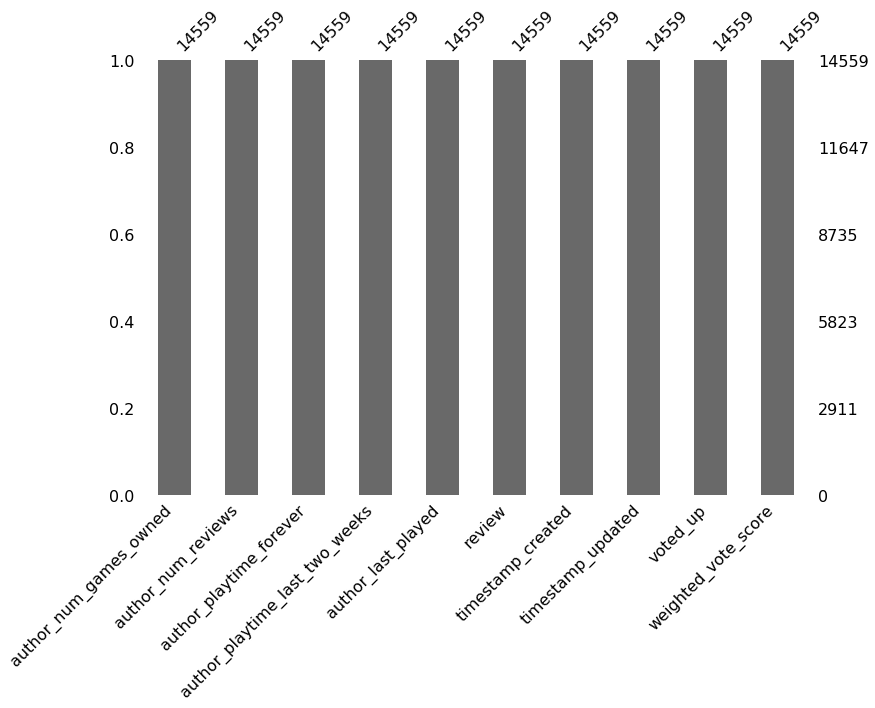

In [22]:
msno.bar(df_raw, figsize=(12,8))

## EDA

In [23]:
df_raw.describe().round(2)

,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,weighted_vote_score
count,14559.00,14559.00,14559.00,14559.00,14559.00
mean,174.71,10.74,32.73,3.48,0.53
std,399.73,34.72,42.96,11.31,0.03
min,0.00,1.00,0.10,0.00,0.50
25%,22.00,2.00,10.05,0.00,0.52
50%,71.00,4.00,20.83,0.25,0.52
75%,190.00,10.00,41.76,2.43,0.53
max,14338.00,2304.00,1333.27,333.63,0.97


In [24]:
df_raw[(df_raw['author_num_games_owned']==0)]

,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_last_played,review,timestamp_created,timestamp_updated,voted_up,weighted_vote_score
357,0,6,58.55,0.00,2020-09-11 13:39:54,game,2020-08-04 14:03:28,2020-08-04 14:03:28,True,0.58
361,0,6,16.27,0.42,2020-09-26 01:16:53,This is a great game. I played the beta a lot ...,2020-08-04 17:57:52,2020-08-04 17:57:52,True,0.58
454,0,3,16.72,0.00,2020-09-12 12:47:07,needs more cum,2020-08-23 09:48:20,2020-08-23 09:48:20,True,0.58
2554,0,1,2.67,0.00,2020-09-08 20:14:12,A TOTAL GARBAGE!!\ni wish i never bought it an...,2020-09-08 18:35:08,2020-09-08 18:35:08,False,0.54
3333,0,1,1.13,0.00,2020-09-04 14:47:27,It’s good\n,2020-09-04 18:03:11,2020-09-04 18:03:11,True,0.53
3788,0,1,1.43,0.00,2020-08-15 23:54:54,I have 70 min on the game. 65 of those are try...,2020-08-14 21:12:07,2020-08-14 21:12:07,False,0.53
5542,0,1,2.70,0.00,2020-08-31 19:19:25,Fun... but a lot of hackers,2020-08-31 19:21:23,2020-08-31 19:21:23,True,0.52
5663,0,1,1.02,0.00,2020-08-30 23:15:43,jebane gówno w które nie da się grać. nie pole...,2020-08-30 23:20:13,2020-08-30 23:22:55,False,0.52
6850,0,1,1.03,0.00,2020-08-23 06:44:20,Great and Very Fun,2020-08-23 09:27:10,2020-08-23 09:27:10,True,0.52
8294,0,1,1.58,0.00,2020-08-15 23:30:09,IT SUCKS THE BUTTONS BARELY REPOND,2020-08-14 20:43:08,2020-08-14 20:43:08,False,0.52


Text(0.5, 1.0, &#39;Weighted Vote Score Distribution&#39;)

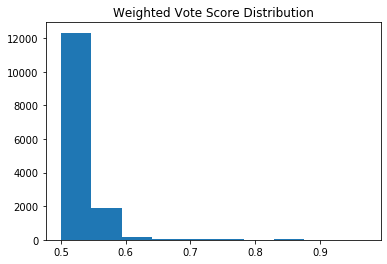

In [26]:
plt.hist(df_raw['weighted_vote_score'])
plt.title("Weighted Vote Score Distribution")

In [27]:
list_hour = [0, 20, 40, max(df_raw.author_playtime_forever)]

In [28]:
bin_labels_3 = ['low', 'medium', 'high']
df_raw['playtime_forever_cat'] = pd.cut(df_raw['author_playtime_forever'],
                              bins=list_hour,
                              labels=bin_labels_3)

In [29]:
results, bin_edges = pd.cut(df_raw['author_playtime_forever'],
                            bins=list_hour,
                            labels=bin_labels_3,
                            retbins=True)

results_table = pd.DataFrame(zip(bin_edges, bin_labels_3),
                            columns=['Threshold', 'category'])

results_table

,Threshold,category
0,0.0,low
1,20.0,medium
2,40.0,high


In [30]:
df_raw['playtime_forever_cat'].value_counts()

low       7041
high      3828
medium    3690
Name: playtime_forever_cat, dtype: int64

Text(0.5, 1.0, &#39;Users Total Playtime&#39;)

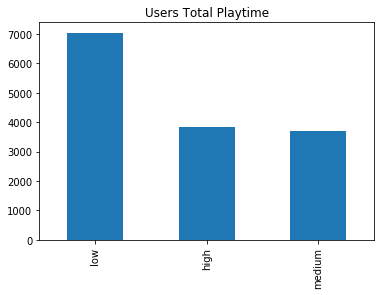

In [32]:
df_raw['playtime_forever_cat'].value_counts().plot(kind= 'bar')
plt.title("Users Total Playtime")

In [33]:
(pd.crosstab(df_raw.voted_up, df_raw.playtime_forever_cat, normalize = 'columns')*100).round(2)

playtime_forever_cat,low,medium,high
voted_up,,,
False,33.05,19.46,16.77
True,66.95,80.54,83.23


In [59]:
cat_products = [0, 50, 100, max(df_raw.author_num_games_owned)]

In [61]:
bin_labels_3 = ['low', 'medium', 'high']
df_raw['prod_cat'] = pd.cut(df_raw['author_num_games_owned'],
                              bins=cat_products,
                              labels=bin_labels_3)

In [62]:
results, bin_edges = pd.cut(df_raw['author_num_games_owned'],
                            bins=cat_products,
                            labels=bin_labels_3,
                            retbins=True)

results_table = pd.DataFrame(zip(bin_edges, bin_labels_3),
                            columns=['Threshold', 'category'])

results_table

,Threshold,category
0,0,low
1,50,medium
2,100,high


In [36]:
df_raw['prod_cat'].value_counts()

low       6067
high      5996
medium    2485
Name: prod_cat, dtype: int64

Text(0.5, 1.0, &#39;Number of Games Owned by Users&#39;)

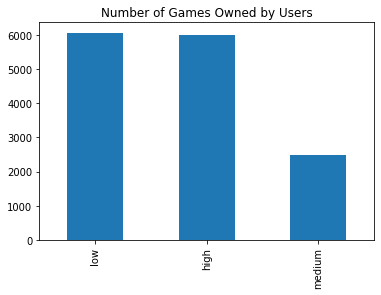

In [37]:
df_raw['prod_cat'].value_counts().plot(kind= 'bar')
plt.title("Number of Games Owned by Users")

In [38]:
(pd.crosstab(df_raw.voted_up, df_raw.prod_cat, normalize = 'columns')*100).round(2)

prod_cat,low,medium,high
voted_up,,,
False,19.85,27.0,30.15
True,80.15,73.0,69.85


In [39]:
cat_reviews = [0, 5, 10, max(df_raw.author_num_reviews)]

In [40]:
df_raw['reviews_cat'] = pd.cut(df_raw['author_num_reviews'],
                              bins=cat_products,
                              labels=bin_labels_3)

In [41]:
df_raw['reviews_cat'].value_counts()

low       14074
medium      354
high        131
Name: reviews_cat, dtype: int64

Text(0.5, 1.0, &quot;Users&#39; Number of Reviews in Steam&quot;)

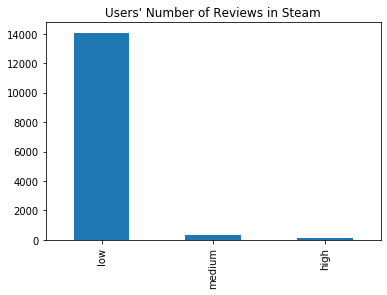

In [42]:
df_raw['reviews_cat'].value_counts().plot(kind= 'bar')
plt.title("Users' Number of Reviews in Steam")

In [41]:
(pd.crosstab(df_raw.voted_up, df_raw.reviews_cat, normalize = 'columns')*100).round(2)

reviews_cat,low,medium,high
voted_up,,,
False,25.27,29.38,20.61
True,74.73,70.62,79.39


In [15]:
df_raw['timestamp_created'] = pd.to_datetime(df_raw['timestamp_created']).dt.normalize()
df_raw['timestamp_updated'] = pd.to_datetime(df_raw['timestamp_updated']).dt.normalize()
df_raw['author_last_played'] = pd.to_datetime(df_raw['author_last_played']).dt.normalize()

In [43]:
ct = pd.crosstab(df_raw.voted_up, df_raw.timestamp_created, rownames=['recommended'], colnames=['date']).T
ct

recommended,False,True
date,,
2020-08-04,110,1364
2020-08-05,92,543
2020-08-06,74,352
2020-08-07,128,336
2020-08-08,73,298
2020-08-09,61,326
2020-08-10,75,322
2020-08-11,59,297
2020-08-12,71,271


&lt;Figure size 720x576 with 0 Axes&gt;

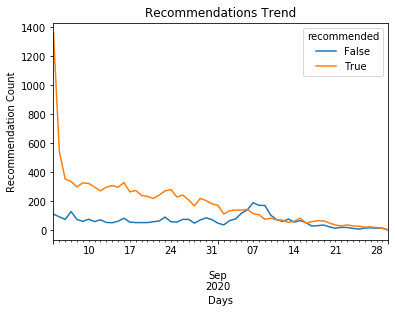

In [44]:
plt.figure(figsize=(10,8))
ct.plot.line()

plt.title('Recommendations Trend')
plt.xlabel('Days') 
plt.ylabel('Recommendation Count') 
plt.show()

In [45]:
reviews_week = df_raw.groupby(pd.Grouper(key='timestamp_created', freq='W')).size()
reviews_week

timestamp_created
2020-08-09    3757
2020-08-16    2569
2020-08-23    2163
2020-08-30    2013
2020-09-06    1571
2020-09-13    1411
2020-09-20     717
2020-09-27     298
2020-10-04      60
Freq: W-SUN, dtype: int64

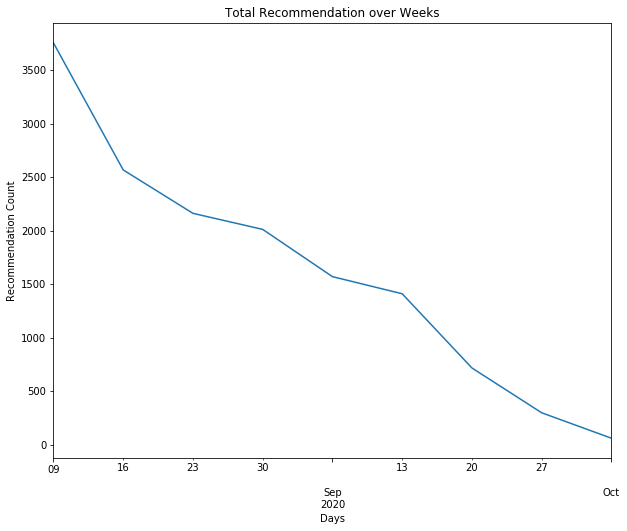

In [46]:
plt.figure(figsize=(10,8))
reviews_week.plot.line()

plt.title('Total Recommendation over Weeks')
plt.xlabel('Days') 
plt.ylabel('Recommendation Count') 
plt.show()

In [43]:
df_avg = df_raw.pivot_table(index='author_last_played', values='author_playtime_last_two_weeks')
df_avg

,author_playtime_last_two_weeks
author_last_played,
2020-08-04,0.000000
2020-08-05,0.000000
2020-08-06,0.000000
2020-08-07,0.000000
2020-08-08,0.000000
2020-08-09,0.000000
2020-08-10,0.000000
2020-08-11,0.000000
2020-08-12,0.000000


In [44]:
last_twoweeks = df_avg.tail(16)

In [45]:
last_twoweeks

,author_playtime_last_two_weeks
author_last_played,
2020-09-15,0.005036
2020-09-16,0.580742
2020-09-17,0.871724
2020-09-18,1.474149
2020-09-19,1.269356
2020-09-20,1.812589
2020-09-21,1.719327
2020-09-22,2.192073
2020-09-23,2.359716


&lt;Figure size 720x576 with 0 Axes&gt;

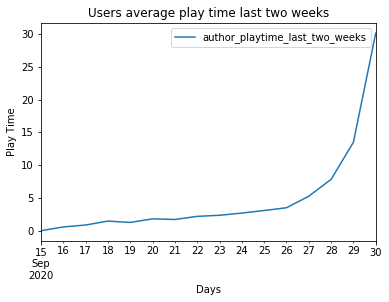

In [46]:
plt.figure(figsize=(10,8))
last_twoweeks.plot.line()

plt.title('Users average play time last two weeks')
plt.xlabel('Days') 
plt.ylabel('Play Time') 
plt.show()

In [50]:
df_raw['author_last_played'].value_counts()

2020-09-29    1709
2020-09-28     868
2020-09-27     828
2020-09-26     713
2020-09-25     627
2020-09-19     450
2020-09-16     445
2020-09-24     430
2020-09-20     421
2020-09-15     417
2020-09-17     406
2020-09-21     401
2020-09-23     388
2020-09-22     381
2020-09-18     376
2020-09-12     267
2020-09-13     266
2020-09-07     256
2020-09-14     226
2020-09-11     224
2020-09-08     223
2020-09-09     223
2020-09-06     216
2020-09-05     213
2020-09-04     211
2020-08-29     199
2020-09-30     194
2020-09-10     192
2020-09-03     182
2020-08-30     181
2020-09-02     176
2020-09-01     169
2020-08-31     167
2020-08-28     149
2020-08-23     134
2020-08-26     125
2020-08-25     125
2020-08-22     123
2020-08-27     112
2020-08-24     109
2020-08-21      99
2020-08-20      86
2020-08-16      78
2020-08-19      72
2020-08-18      68
2020-08-15      64
2020-08-13      64
2020-08-14      61
2020-08-05      57
2020-08-17      56
2020-08-04      52
2020-08-09      50
2020-08-11  

### Take data with 1 hour of total playtime for text analysis

In [17]:
df_text = df_raw[(df_raw['author_playtime_forever']>=1)]
df_text.head()

,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_last_played,review,timestamp_created,timestamp_updated,voted_up,weighted_vote_score
0,348,34,16.18,4.12,2020-09-20,Fall Guys is a chill and fun game but it rea...,2020-08-17,2020-08-17,True,0.97
1,54,23,123.25,13.65,2020-09-28,"I gave a little Hug to a player, he stared bac...",2020-08-07,2020-08-07,True,0.95
2,5,2,29.85,0.12,2020-09-17,I'd reccomend it so much i'd buy it for you,2020-08-15,2020-08-15,True,0.94
3,74,9,24.25,0.00,2020-09-06,you can hug people,2020-08-24,2020-08-24,True,0.94
4,1094,36,6.52,0.00,2020-09-05,"When I was a little boy, I liked to see the Wi...",2020-08-09,2020-08-09,True,0.93


In [49]:
df_text = df_text[['review', 'voted_up']]

In [52]:
df_text.reset_index(inplace=True, drop=True)

In [54]:
df_text

,review,voted_up
0,Fall Guys is a chill and fun game but it rea...,True
1,"I gave a little Hug to a player, he stared bac...",True
2,I'd reccomend it so much i'd buy it for you,True
3,you can hug people,True
4,"When I was a little boy, I liked to see the Wi...",True
...,...,...
14247,Well made game that i cant get enough of! Many...,True
14248,very fun and competitive especially with frien...,True
14249,This game is extremely fun and a nice break fr...,True
14250,Fun to play & they keep working on this game,True


In [55]:
df_text.to_csv('.../text_data.csv', index = False, encoding = 'utf-8')